# Tutorial #2 - Explore and Visualize
Welcome to the IBM Data Scientist Workbench.  This notebook is the **second** in a series of "getting started" tutorials that is designed to introduce some basic concepts and help get you familiar with using the workbench.  

In this notebook, we will explore and visualize the olympic medals data that you added to your workbench in **Tutorial #1 - Get Data**. Specifically, this tutorial covers:

1. Load data in memory using a `pandas` DataFrame
1. Explore and manipulate data using DataFrame functions
1. Group data by columns 
1. Calculate statistics over grouped data
1. Plot data using the pre-installed `matplotlib` package
1. Plot data using a third-party library

We will do this in the context of answering the following questions:

1. Which discipline and event has awarded the most gold medals?
1. Which country has won the most gold, silver, and bronze medals?

## Pre-requisites
* A basic familiarity with the [Python Programming Language](https://docs.python.org/3/) and the [IPython Notebook](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb).
* A basic understanding of [common graphical techniques](http://en.wikipedia.org/wiki/Exploratory_data_analysis#Techniques) used for exploratory data analysis. 
* A basic understanding of [`matplotlib`](http://matplotlib.org)

## Load Data
Our first step is to load the olympic medal data into a pandas [DataFrame](http://pandas.pydata.org/pandas-docs/dev/dsintro.html#dataframe) in memory.  As demonstrated in **Tutorial #1 - Get Data**, we can do this by 
following steps:

1. Download the olympic medal data in CSV format.  Click this [Box link](https://ibm.box.com/s/8u9yc1hj7ddvptablj312asm6sfgn5gw) to open the document in a new browser window. 
1. Save the CSV file to your computer by clicking on the Download button.
1. Drag the CSV file from your desktop onto the workbench (Note that the CSV file appears under your **Recent Data** panel in the sidebar.)
1. Click the arrow button (**>**) next to the CSV file you just uploaded.
1. In the section that appears below the item, click "Rename"
1. Change the name of the file to "medals.csv" and press Enter or click outside the name.
1. Execute the code cell by clicking the (**&#9658;**) play button on the notebook toolbar, or by pressing Ctrl-Enter.

In [3]:
import pandas
medals_df = pandas.read_csv('/resources/medals.csv')
# Prune non-data rows
medals_df = medals_df.dropna()

## Explore
So what does the olympic medal data look like? We can peek at the data and its structure by looking at the first few rows.  The DataFrame's `head()` method exists for this purpose.

In [6]:
medals_df.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


Each row provides:

* The year the medal was awarded
* The city where the games took place
* The sport and discipline
* The specific event
* The nationality of the medal winner 
* The gender of the medal winner
* The type of medal

A first logical question might be, for what time period does the data apply?  To find out, we turn our attention to the 'Year' column, which we can access directly from the DataFrame object.  We can invoke the built-in `min()` and `max()` functions on the column (which is a pandas [Series](http://pandas.pydata.org/pandas-docs/dev/dsintro.html#series)).

In [11]:
medals_df.Year.min(), medals_df.Year.max()


('1924', '2006')

To be more precise, we can list all years for which we have medal data.

In [20]:
medals_df.Year.unique()

array(['1924', '1928', '1932', '1936', '1948', '1952', '1956', '1960',
       '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992',
       '1994', '1998', '2002', '2006'], dtype=object)

OK.  So it looks like we have medal data for all winter olympics from 1924 through 2006.

Next question: How many medals have been awarded?  The easiest way to find out is to count the rows using Python's built-in `len()` function, which returns the number of rows.

In [16]:
len(medals_df)

2311

How about a sanity check?  What are the distinct medal colors for all medals awarded?  And how many of each color were awarded?  We can answer these questions without much effort.  Here we access the DataFrame's `Medal` column and invoke built-in functions on the resulting Series.

In [21]:
medals_df.Medal.unique()

array(['Silver', 'Gold', 'Bronze'], dtype=object)

In [22]:
medals_df.Medal.value_counts()

Gold      774
Silver    773
Bronze    764
Name: Medal, dtype: int64

Well, these results make sense.  

Let us now list all the winter olympic sports and disciplines that have awarded medals.  To do this, we first use the DataFrame [`grouby()`](http://pandas.pydata.org/pandas-docs/stable/groupby.html) function to group all medal data by sport and discipline.  We then list the keys used to identify each group.

In [26]:
disciplines = medals_df.groupby(['Sport','Discipline'])
disciplines.groups.keys()

[('Skiing', 'Snowboard'),
 ('Curling', 'Curling'),
 ('Skiing', 'Cross Country S'),
 ('Skating', 'Short Track S.'),
 ('Bobsleigh', 'Skeleton'),
 ('Bobsleigh', 'Bobsleigh'),
 ('Skiing', 'Nordic Combined'),
 ('Skating', 'Speed skating'),
 ('Skiing', 'Ski Jumping'),
 ('Skiing', 'Alpine Skiing'),
 ('Ice Hockey', 'Ice Hockey'),
 ('Skating', 'Figure skating'),
 ('Biathlon', 'Biathlon'),
 ('Skiing', 'Freestyle Ski.'),
 ('Luge', 'Luge')]

## Question 1: Which discipline and event has awarded the most gold medals?
The first step we must take to answer this question is to filter our data.  We want to ensure we only consider gold medals.  We can apply a filter to our DataFrame by selecting records using a boolean indicator.  We store the result in a new DataFrame.

In [27]:
gold_df = medals_df[medals_df.Medal == 'Gold']

Next, we want to group the gold medals by the `Discipline` and `Event` columns.  The result gives us the gold medals awarded by event.

In [28]:
by_event = gold_df.groupby(['Discipline','Event'])

We can get a glimpse of the grouped data using the DataFrame `head()` function.

In [29]:
by_event.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold
10,1924,Chamonix,Skating,Speed skating,FIN,5000m,M,Gold
14,1924,Chamonix,Skating,Speed skating,FIN,combined (4 events),M,Gold
20,1924,Chamonix,Curling,Curling,GBR,curling,M,Gold
30,1924,Chamonix,Skiing,Cross Country S,NOR,18km,M,Gold
33,1924,Chamonix,Skiing,Cross Country S,NOR,50km,M,Gold


We can easily tally the number of gold medals per event using the pandas DataFrame `count()` function.

In [30]:
golds_by_event = by_event.Medal.count()

Finally, we sort the results.  Here are the 10 events with the most gold medals awarded.

In [31]:
golds_by_event.sort(ascending=False)
golds_by_event.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


Discipline      Event       
Figure skating  individual      40
Speed skating   1500m           35
                500m            34
Alpine Skiing   downhill        32
                slalom          32
                giant slalom    30
Speed skating   5000m           26
Luge            singles         24
Ice Hockey      ice hockey      23
Speed skating   1000m           22
Name: Medal, dtype: int64

**Answer:** Individual figure skating has awarded the most gold medals to olympians with **40**.

## Question 2: Which country has won the most gold, silver, and bronze medals?
For this question, we need to group and count medals awarded by country code.  Because we need sub-totals by medal color, we must group the data by both the `NOC` and `Medal` columns.  We calculate the medal counts for each group using the resulting DataFrame's `size()` function, which gives us the number of rows in each group.

In [32]:
medals_by_country = medals_df.groupby(['NOC','Medal']).size()

The result is a pandas Series object containing the medal counts by country.

In [33]:
medals_by_country.head(10)

NOC  Medal 
AUS  Bronze     3
     Gold       3
AUT  Bronze    70
     Gold      51
     Silver    64
BEL  Bronze     3
     Gold       1
     Silver     1
BLR  Bronze     3
     Silver     3
dtype: int64

We want to convert this Series to a DataFrame containing a column for each medal color.  Fortunately, this is easy to do using the Series' [`unstack()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unstack.html) function, which pivots the data for us by creating a column for each medal color.

In [34]:
medals_by_country_df = medals_by_country.unstack()
medals_by_country_df.head()

Medal,Bronze,Gold,Silver
NOC,,,
AUS,3.0,3.0,NaN
AUT,70.0,51.0,64.0
BEL,3.0,1.0,1.0
BLR,3.0,NaN,3.0
BUL,3.0,1.0,2.0


Many countries do not have medals of every color, so we replace any missing data with a zero value.

In [35]:
medals_by_country_df.fillna(0, inplace=True)

Now we can answer our question using yet another DataFrame function, [`idxmax()`](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.idxmax.html), which gives us the index (in this case, the country code) corresponding to the maximum count for each medal color (column in our DataFrame).

In [36]:
medals_by_country_df.idxmax()

Medal
Bronze    NOR
Gold      NOR
Silver    NOR
dtype: object

**Norway (NOR)** appears to be the winner.

### Plot
We can use the popular [`matplotlib`](http://matplotlib.org/) package to produce a plot of the results.

<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** The IBM Data Scientist Workbench pre-installs many third-party Python libraries and packages.  To see a list of these packages, run `!pip freeze` in a code cell.</div>

First, tell the notebook server to render charts inline:

In [37]:
%matplotlib inline

We sort the results by highest gold medal count.

In [38]:
medals_by_country_df.sort('Gold', ascending=False, inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Now we can use the DataFrame `plot()` function to produce our plot.  We plot individual medal counts for the top 15 countries.

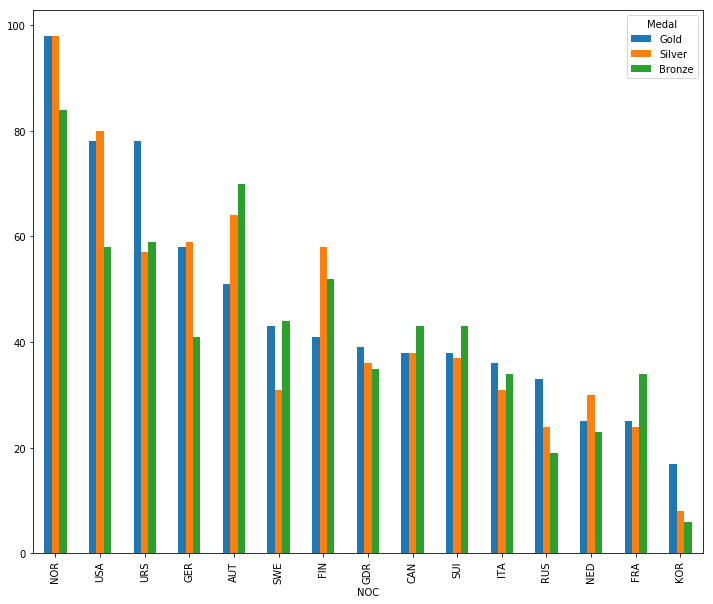

In [39]:
medals_by_country_df[['Gold','Silver','Bronze']][:15]\
.plot(kind='bar', figsize=(12,10))

The plot confirms that Norway has been on every step of the winter olympic podium more than any other country.

Let's take a look at another plot: the olympic medals won by Norway over time.  To do this, we must filter our original medal data (containing all medal colors) to just those won by Norway, and group by Year.  We then count the number of medals for each year.  Amazingly, we can do all this in a single line of code.

In [40]:
nor_medals_year = medals_df[medals_df.NOC == 'NOR'].groupby('Year').size()

In [41]:
nor_medals_year

Year
1924    17
1928    15
1932    10
1936    15
1948    10
1952    16
1956     4
1960     6
1964    15
1968    14
1972    12
1976     7
1980    10
1984     9
1988     5
1992    20
1994    26
1998    25
2002    25
2006    19
dtype: int64

We can plot the resulting pandas Series using it's built-in `plot()` function, which is just a convenience function that wraps `matplotlib`.

In [ ]:
nor_medals_year.plot(kind='bar', figsize=(12,6))

## Third-Party Visualization Libraries
It is relatively easy to create plots quickly using `pandas` and `matplotlib`.  If you want to take your plots to the next level in terms of enhanced presentation, it is possible to install third-party libraries to help you.

One such library is [prettyplotlib](http://olgabot.github.io/prettyplotlib/), which enhances `matplotlib` plots with better default colors, etc.  This can be extremely valuable if your notebook is to be used for presentations.

<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** You have the ability to install Python packages in your IBM Data Scientist Workbench environment.  Just use the `pip` package installer.</div>

Here we use the shorthand [IPython cell magic](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) (!) to invoke `pip` to install `prettyplotlib`.

In [42]:
# Install third party color palette 
!pip install prettyplotlib

Now we create a color palette...

In [43]:
# Use color palette "Set3" from http://bl.ocks.org/mbostock/5577023
import brewer2mpl
set3 = brewer2mpl.get_map('Set3', 'qualitative', 10).mpl_colors

...and use it to generate a pretty pie chart showing the percent of all medals awarded to the top 10 countries.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


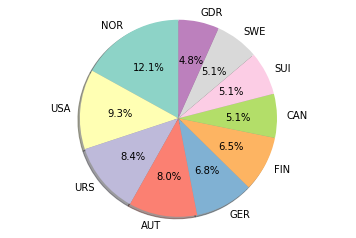

In [44]:
# Plot the top 10 countries based on podium appearances.
import pylab as plt
# Calculate the total medals for each country
t = medals_by_country_df.sum(axis=1)
# Limit to top 10 medal-winning countries
t.sort(ascending=False)
awards = t[:10]
countries = awards.index.values
total = float(t.sum())
# Create a pie chart
pct = lambda x: '{p:1.1f}%'.format(p=(x*sum(awards)/100)/total*100)
plt.pie(awards, labels=countries, shadow=True, 
        autopct=pct, colors=set3, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

## Online Tutorials
If you need further instruction on how to create visualizations in IPython notebook, there is content available online.  Here is an example.  The video below represents a resource for visual programming using `matplotlib`.

Note: The code cell below shows one way you can embed a video in your notebook. 

In [ ]:
from IPython.display import YouTubeVideo
# Matplotlib Python Tutorial Part 1: Basics and your first Graph!
# Tutorial series by Sentdex - http://sentdex.com/about-us/
YouTubeVideo('wAwQ-noyB98')

## Next: Organize
Our next tutorial topic will focus on how IBM Data Scientist Workbench can help you organize your work. Visit the [Welcome](/pages/welcome) page to download **Tutorial #3 - Organize**.

## Want to learn more?

<a href="http://bigdatauniversity.com/courses/introduction-to-python/?utm_source=tutorial2_explore&utm_medium=dswb&utm_campaign=bdu"><img src = "https://ibm.box.com/shared/static/l8yxiek0fg4e15lwz0ikgunj338nrrtd.png"> </a>

Created by: <a href="https://bigdatauniversity.com/?utm_source=bducreatedbylink&utm_medium=dswb&utm_campaign=bdu">The Big Data University Team</a>